In [1]:
import pandas as pd
import numpy as np

In [2]:
# dataset link = 'https://archive.ics.uci.edu/ml/datasets/Bank+Marketing'
df = pd.read_csv('dataset/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.shape

(4521, 17)

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Pre-processing**

In [5]:
# Filter dataset
df_train = df[(df['job'] != 'unknown') & 
              (df['marital'] != 'unknown') & 
              (df['education'] != 'unknown') & 
              (df['default'] != 'unknown') & 
              (df['housing'] != 'unknown') & 
              (df['loan'] != 'unknown')]
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df_train.shape

(4311, 17)

In [7]:
X = df_train.drop(columns='y')
y = df_train.y

In [8]:
# Convert numerical
X = pd.get_dummies(X)
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

---
## A. Logistic Regression

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(solver='liblinear', max_iter=100)
modelLR.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [12]:
predLR = modelLR.predict(X_test)
accurLR = accuracy_score(y_test, predLR)
matrixLR = confusion_matrix(y_test, predLR)

print(accurLR)
print(matrixLR)

0.8980301274623407
[[747  20]
 [ 68  28]]


---
## B. K-Nearest Neighbors

In [13]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(1, 10):
    modelKNN = KNeighborsClassifier(n_neighbors=i)
    modelKNN.fit(X_train, y_train)
    pred_i = modelKNN.predict(X_test)
    error.append(np.mean(pred_i != y_test))

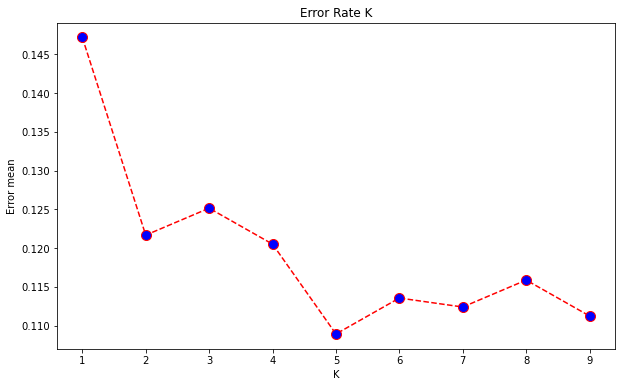

In [14]:
plt.figure(figsize=(10, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10
        )
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')
plt.show()

Berdasarkan plot tersebut dapat diketahui bahwa error terkecil yang didapatkan yaitu 0.109 pada K = 5.

In [15]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
predKNN = modelKNN.predict(X_test)
accurKNN = accuracy_score(y_test, predKNN)
matrixKNN = confusion_matrix(y_test, predKNN)

print(accurKNN)
print(matrixKNN)

0.8910776361529548
[[740  27]
 [ 67  29]]


---
## C. Support Vector Machine

In [17]:
# Support Vector Machine
from sklearn import svm

modelSVM = svm.SVC()
modelSVM.fit(X_train, y_train)

SVC()

In [18]:
predSVM = modelSVM.predict(X_test)
accurSVM = accuracy_score(y_test, predSVM)
matrixSVM = confusion_matrix(y_test, predSVM)

print(accurSVM)
print(matrixSVM)

0.8887601390498262
[[767   0]
 [ 96   0]]


---
## D. Decision Tree

In [19]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(criterion="gini") # gini / entropy
modelDT.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
predDT = modelDT.predict(X_test)
accurDT = accuracy_score(y_test, predDT)
matrixDT = confusion_matrix(y_test, predDT)

print(accurDT)
print(matrixDT)

0.8818076477404403
[[715  52]
 [ 50  46]]


---
## E. Random Forest

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=100)
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
predRF = modelRF.predict(X_test)
accurRF = accuracy_score(y_test, predRF)
matrixRF = confusion_matrix(y_test, predRF)

print(accurRF)
print(matrixRF)

0.8980301274623407
[[750  17]
 [ 71  25]]


---
## F. Naive Bayes

In [23]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB 

modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

GaussianNB()

In [24]:
predNB = modelNB.predict(X_test)
accurNB = accuracy_score(y_test, predNB)
matrixNB = confusion_matrix(y_test, predNB)

print(accurNB)
print(matrixNB)

0.8412514484356894
[[680  87]
 [ 50  46]]


---
**Accuracy**

In [25]:
dfAcc = pd.DataFrame(data=[accurLR, accurKNN, accurSVM, accurDT, accurRF, accurNB],
                     columns=['Accuracy'],
                     index=['Logistic Regression',
                            'K-Nearest Neighbors',
                            'Support Vector Machine',
                            'Decision Tree',
                            'Random Forest',
                            'Naive Bayes']
                    )

dfAcc

,Accuracy
Logistic Regression,0.898030
K-Nearest Neighbors,0.891078
Support Vector Machine,0.888760
Decision Tree,0.881808
Random Forest,0.898030
Naive Bayes,0.841251


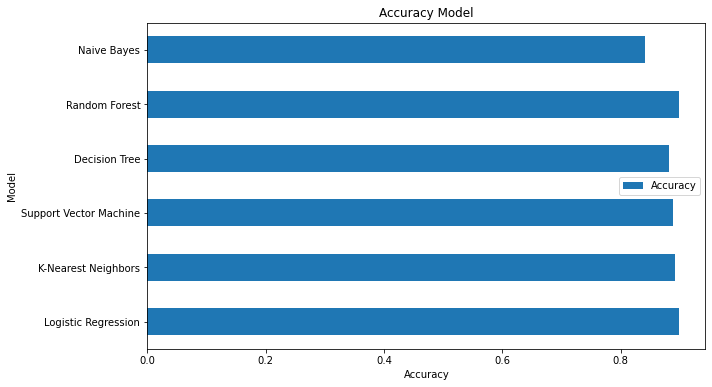

In [26]:
dfAcc.plot(kind='barh', figsize=(10, 6))  
plt.title('Accuracy Model')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

Berdasarkan plot tersebut terlihat bahwa model yang memiliki tingkat akurasi tertinggi pada bank marketing dataset yaitu Logistic Regression dan Random Forest. Meskipun kurang lebih sama dalam tingkat akurasi, namun dalam waktu eksekusi Logistic Reression lebih cepat dibandingkan Random Forest.